In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import keras
import scipy.misc

In [3]:
cols=["pixel"+str(i) for i in range(784)]
Xr = pd.read_csv('train.csv')
Yr = Xr["label"]
Xr = Xr.as_matrix(cols)


Xe = pd.read_csv('test.csv')
Xe = Xe.as_matrix(cols)





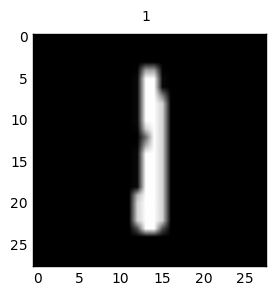

In [10]:
def display_digit(Xs,y=None):
    fig = plt.figure(figsize=(3,3))
    sq=Xs.reshape(28,28)
    plt.imshow(sq,cmap = cm.Greys_r)
    if y!=None:
        fig.suptitle(str(y))
        
def binary_labels(Y,n):
    result = []
    for i in Y:
        temp_zeros=[0 for i in range(n)]
        temp_zeros[i]=1
        result.append(np.array(temp_zeros))
    return np.array(result)



In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(output_dim=64, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_26 (Dense)                 (None, 64)            50240       dense_input_10[0][0]             
____________________________________________________________________________________________________
activation_26 (Activation)       (None, 64)            0           dense_26[0][0]                   
____________________________________________________________________________________________________
dense_27 (Dense)                 (None, 10)            650         activation_26[0][0]              
____________________________________________________________________________________________________
activation_27 (Activation)       (None, 10)            0           dense_27[0][0]                   
Total params: 50890
_______________________________________________________________________

In [32]:
model.fit(Xr,binary_labels(Yr,10),verbose=1,batch_size=32)

Epoch 1/10
42000/42000 [==============================] - 3s - loss: 0.8992 - acc: 0.7770     
Epoch 2/10
42000/42000 [==============================] - 3s - loss: 0.4803 - acc: 0.8790     
Epoch 3/10
42000/42000 [==============================] - 3s - loss: 0.4054 - acc: 0.8952     
Epoch 4/10
42000/42000 [==============================] - 3s - loss: 0.3713 - acc: 0.9011     
Epoch 5/10
42000/42000 [==============================] - 3s - loss: 0.3476 - acc: 0.9043     
Epoch 6/10
42000/42000 [==============================] - 3s - loss: 0.3338 - acc: 0.9075     
Epoch 7/10
42000/42000 [==============================] - 4s - loss: 0.3155 - acc: 0.9107     
Epoch 8/10
42000/42000 [==============================] - 3s - loss: 0.3050 - acc: 0.9127     
Epoch 9/10
42000/42000 [==============================] - 3s - loss: 0.2944 - acc: 0.9144     
Epoch 10/10
42000/42000 [==============================] - 5s - loss: 0.2906 - acc: 0.9170     


In [33]:
model.evaluate(Xr,binary_labels(Yr,10),verbose=1)

41760/42000 [============================>.] - ETA: 0s

[0.27966546719414848, 0.92028571428571426]

In [17]:
model.predict_classes(Xe[0:100])

 32/100 [========>.....................] - ETA: 0s

array([2, 0, 9, 7, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 5, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 0, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 5, 9, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 2, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 8, 4, 3, 9, 7, 4])